In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
import acquire
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
np.random.seed(123)

In [9]:
titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [2]:
def prep_titanic(df):
    df = df[(df.age.notna()) & (df.embarked.notna())]
    df = df.drop(columns=['deck', 'passenger_id', 'class'])
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], prefix=['sex', 'embark'])
    df = pd.concat([df, dummy_df.drop(columns=['sex_male'])], axis=1)
    df = df.drop(columns=['sex', 'embark_town']) 
    df = df.rename(columns={"sex_female": "is_female"})
    return df

In [3]:
df = acquire.get_titanic_data()

In [4]:
df = prep_titanic(df)
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,S,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,S,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,0,0,1


In [6]:
#1. I predict that those that went alone are more likely to have not survived
x = titanic[['alone', 'is_female', 'embark_Southampton']]
y = titanic.survived

x_train_and_validate, x_test, y_train_and_validate, y_test = train_test_split(x, y, random_state=123, test_size=.3)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [8]:
x_train.head()

,alone,is_female,embark_Southampton
678,0,1,1
789,1,0,0
763,0,1,1
246,1,1,1
378,1,0,0


In [9]:
y_train.value_counts()

0    246
1    152
Name: survived, dtype: int64

In [10]:
tree = DecisionTreeClassifier(max_depth = 2)

In [11]:
#2.
tree.fit(x_train, y_train)

print(export_text(tree, feature_names=x_train.columns.tolist()))

|--- is_female <= 0.50
|   |--- embark_Southampton <= 0.50
|   |   |--- class: 0
|   |--- embark_Southampton >  0.50
|   |   |--- class: 0
|--- is_female >  0.50
|   |--- embark_Southampton <= 0.50
|   |   |--- class: 1
|   |--- embark_Southampton >  0.50
|   |   |--- class: 1



In [12]:
#3.
tree.predict(x_train)

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [13]:
predictions = tree.predict(x_train)
actual = y_train

In [14]:
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,204,42
1,45,107


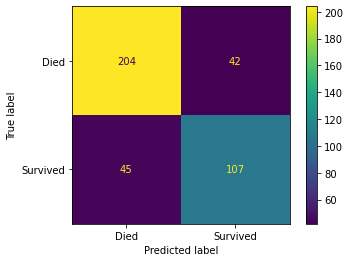

In [15]:
plot_confusion_matrix(tree, x_train, y_train, display_labels=['Died', 'Survived'])

In [16]:
#4.
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       246
           1       0.72      0.70      0.71       152

    accuracy                           0.78       398
   macro avg       0.77      0.77      0.77       398
weighted avg       0.78      0.78      0.78       398



In [17]:
#5.
tree = DecisionTreeClassifier(max_depth = None)
tree.fit(x_train, y_train)

print(export_text(tree, feature_names=x_train.columns.tolist()))

|--- is_female <= 0.50
|   |--- embark_Southampton <= 0.50
|   |   |--- alone <= 0.50
|   |   |   |--- class: 0
|   |   |--- alone >  0.50
|   |   |   |--- class: 0
|   |--- embark_Southampton >  0.50
|   |   |--- alone <= 0.50
|   |   |   |--- class: 0
|   |   |--- alone >  0.50
|   |   |   |--- class: 0
|--- is_female >  0.50
|   |--- embark_Southampton <= 0.50
|   |   |--- alone <= 0.50
|   |   |   |--- class: 1
|   |   |--- alone >  0.50
|   |   |   |--- class: 1
|   |--- embark_Southampton >  0.50
|   |   |--- alone <= 0.50
|   |   |   |--- class: 1
|   |   |--- alone >  0.50
|   |   |   |--- class: 1



In [18]:
tree.predict(x_train)

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [19]:
predictions = tree.predict(x_train)
actual = y_train

In [20]:
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,204,42
1,45,107


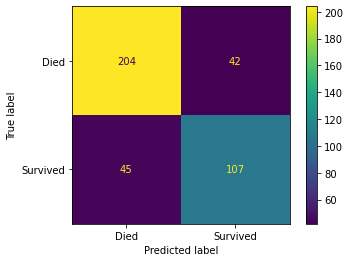

In [21]:
plot_confusion_matrix(tree, x_train, y_train, display_labels=['Died', 'Survived'])

In [22]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       246
           1       0.72      0.70      0.71       152

    accuracy                           0.78       398
   macro avg       0.77      0.77      0.77       398
weighted avg       0.78      0.78      0.78       398



In [103]:
#6. The one with greater depth had the better results

In [1]:
#7.
metrics = []

for i in range(1, 25):
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    tree = tree.fit(X_train, y_train)

    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

NameError: name 'DecisionTreeClassifier' is not defined

In [2]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [3]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

NameError: name 'df' is not defined

In [150]:
#1.
df = acquire.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [151]:
def prep_telco(telco):
    telco = telco.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])

    telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})
    telco['partner_encoded'] = telco.partner.map({'Yes': 1, 'No': 0})
    telco['dependents_encoded'] = telco.dependents.map({'Yes': 1, 'No': 0})
    telco['phone_service_encoded'] = telco.phone_service.map({'Yes': 1, 'No': 0})
    telco['paperless_billing_encoded'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
    telco['churn_encoded'] = telco.churn.map({'Yes': 1, 'No': 0})
    
    dummy_df = pd.get_dummies(telco[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type'
                            ]],
                              drop_first=True)
    telco = pd.concat( [telco, dummy_df], axis=1 )
    
    return telco

In [152]:
df = prep_telco(df)

In [153]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [154]:
x = train[['streaming_tv_Yes', 'streaming_movies_Yes']]
y = train.senior_citizen

x_train_and_validate, x_test, y_train_and_validate, y_test = train_test_split(x, y, random_state=123, test_size=.3)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [155]:
tree = DecisionTreeClassifier(max_depth = 1)

In [156]:
tree.fit(x_train, y_train)

print(export_text(tree, feature_names=x_train.columns.tolist()))

|--- streaming_movies_Yes <= 0.50
|   |--- class: 0
|--- streaming_movies_Yes >  0.50
|   |--- class: 0



In [157]:
tree.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0])

In [158]:
predictions = tree.predict(x_train)
actual = y_train

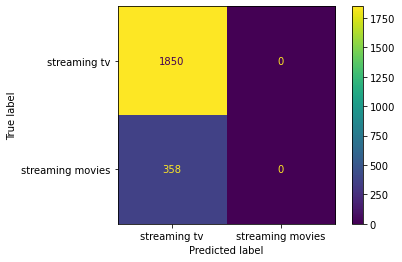

In [159]:
plot_confusion_matrix(tree, x_train, y_train, display_labels=['streaming tv', 'streaming movies'])

In [53]:
#Random Forest
#1.
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

In [6]:
def prep_titanic(df):
    df = df[(df.age.notna()) & (df.embarked.notna())]
    df = df.drop(columns=['deck', 'passenger_id', 'class'])
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], prefix=['sex', 'embark'])
    df = pd.concat([df, dummy_df.drop(columns=['sex_male'])], axis=1)
    df = df.drop(columns=['sex', 'embark_town']) 
    df = df.rename(columns={"sex_female": "is_female"})
    return df

In [ ]:
df = prep_titanic(df)
df.head()

In [18]:
df = df.drop(columns= ['pclass', 'embarked', 'fare', 'age'])

In [19]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [20]:
train, validate, test = train_validate_test_split(df, target='survived', seed=123) 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [21]:
rf = RandomForestClassifier(min_samples_leaf=1,max_depth=10, random_state=123)

In [22]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=123)

In [23]:
print(rf.feature_importances_)

[0.04413088 0.13325526 0.07803188 0.58526338 0.09177824 0.04115758
 0.02638278]


In [27]:
#2.
y_pred = rf.predict(X_train)

In [28]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.61002593, 0.38997407],
       [0.71311909, 0.28688091],
       [0.81318708, 0.18681292],
       [0.81318708, 0.18681292],
       [0.81318708, 0.18681292],
       [0.81318708, 0.18681292],
       [0.81318708, 0.18681292],
       [0.81318708, 0.18681292],
       [0.37280491, 0.62719509],
       [0.81318708, 0.18681292],
       [0.81318708, 0.18681292],
       [0.71311909, 0.28688091],
       [0.81318708, 0.18681292],
       [0.31436494, 0.68563506],
       [0.81318708, 0.18681292],
       [0.81318708, 0.18681292],
       [0.25937793, 0.74062207],
       [0.71311909, 0.28688091],
       [0.37547176, 0.62452824],
       [0.69474858, 0.30525142],
       [0.72293198, 0.27706802],
       [0.37280491, 0.62719509],
       [0.3207249 , 0.6792751 ],
       [0.32868552, 0.67131448],
       [0.25099669, 0.74900331],
       [0.81318708, 0.18681292],
       [0.81318708, 0.18681292],
       [0.84847631, 0.15152369],
       [0.21680236, 0.78319764],
       [0.81318708, 0.18681292],
       [0.

In [29]:
#3.
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.79


In [30]:
print(confusion_matrix(y_train, y_pred))

[[197  40]
 [ 43 118]]


In [31]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       237
           1       0.75      0.73      0.74       161

    accuracy                           0.79       398
   macro avg       0.78      0.78      0.78       398
weighted avg       0.79      0.79      0.79       398



In [32]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.74


In [42]:
#4.
rf = RandomForestClassifier(min_samples_leaf=3, max_depth=2, random_state=123)

In [43]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=123)

In [44]:
print(rf.feature_importances_)

[0.05429514 0.15991793 0.1381294  0.45339808 0.11451299 0.0240776
 0.05566886]


In [45]:
y_pred = rf.predict(X_train)

In [46]:
y_pred_proba = rf.predict_proba(X_train)

In [47]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.78


In [48]:
print(confusion_matrix(y_train, y_pred))

[[200  37]
 [ 49 112]]


In [49]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       237
           1       0.75      0.70      0.72       161

    accuracy                           0.78       398
   macro avg       0.78      0.77      0.77       398
weighted avg       0.78      0.78      0.78       398



In [50]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.75


In [ ]:
#5.
the accuracy of the random forest was about the same, little lower for train, higher for test

In [54]:
#KNN
#1.
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
y_pred = knn.predict(X_train)

In [57]:
y_pred_proba = knn.predict_proba(X_train)

In [58]:
#2.
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.80


In [59]:
print(confusion_matrix(y_train, y_pred))

[[203  34]
 [ 45 116]]


In [60]:
#3.
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       237
           1       0.77      0.72      0.75       161

    accuracy                           0.80       398
   macro avg       0.80      0.79      0.79       398
weighted avg       0.80      0.80      0.80       398



In [61]:
#4.
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [63]:
y_pred = knn.predict(X_train)

In [64]:
y_pred_proba = knn.predict_proba(X_train)

In [65]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.79


In [66]:
print(confusion_matrix(y_train, y_pred))

[[202  35]
 [ 50 111]]


In [67]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       237
           1       0.76      0.69      0.72       161

    accuracy                           0.79       398
   macro avg       0.78      0.77      0.77       398
weighted avg       0.78      0.79      0.78       398



In [68]:
#5.
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [69]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [70]:
y_pred = knn.predict(X_train)

In [71]:
y_pred_proba = knn.predict_proba(X_train)

In [72]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.77


In [73]:
print(confusion_matrix(y_train, y_pred))

[[194  43]
 [ 49 112]]


In [74]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       237
           1       0.72      0.70      0.71       161

    accuracy                           0.77       398
   macro avg       0.76      0.76      0.76       398
weighted avg       0.77      0.77      0.77       398



In [75]:
#7.
#the model with a lower k is the one that did the best. 
#probably because a higher k means it can be interpreted in more ways

In [137]:
#Logistic Regression
#1.
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [104]:
def prep_titanic(df):
    df = df[(df.age.notna()) & (df.embarked.notna())]
    df = df.drop(columns=['deck', 'passenger_id', 'class'])
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], prefix=['sex', 'embark'])
    df = pd.concat([df, dummy_df.drop(columns=['sex_male'])], axis=1)
    df = df.drop(columns=['sex', 'embark_town']) 
    df = df.rename(columns={"sex_female": "is_female"})
    return df

In [88]:
df = prep_titanic(df)
df = df.drop(columns =['embarked', 'sibsp', 'parch', 'alone', 'is_female', 'embark_Cherbourg', 'embark_Queenstown', 'embark_Southampton'])
df.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [89]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [90]:
train, validate, test = train_validate_test_split(df,
                                                  target = 'survived',
                                                  seed=123)

In [91]:
train.head()

,survived,pclass,age,fare
450,0,2,36.0,27.75
543,1,2,32.0,26.00
157,0,3,30.0,8.05
462,0,1,47.0,38.50
397,0,2,46.0,26.00


In [92]:
logit = LogisticRegression(C=1, random_state=123)

In [93]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [94]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [95]:
X_train.head()

,pclass,age,fare
450,2,36.0,27.75
543,2,32.0,26.00
157,3,30.0,8.05
462,1,47.0,38.50
397,2,46.0,26.00


In [96]:
y_pred = logit.predict(X_train)

In [97]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,

In [98]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba

array([[0.6107518 , 0.3892482 ],
       [0.5760415 , 0.4239585 ],
       [0.81516621, 0.18483379],
       [0.41141721, 0.58858279],
       [0.69741659, 0.30258341],
       [0.8317112 , 0.1682888 ],
       [0.51425633, 0.48574367],
       [0.80941081, 0.19058919],
       [0.29524592, 0.70475408],
       [0.80259351, 0.19740649],
       [0.85650343, 0.14349657],
       [0.24029964, 0.75970036],
       [0.75904057, 0.24095943],
       [0.17770809, 0.82229191],
       [0.7581657 , 0.2418343 ],
       [0.74446794, 0.25553206],
       [0.21912747, 0.78087253],
       [0.59922298, 0.40077702],
       [0.70009385, 0.29990615],
       [0.60077615, 0.39922385],
       [0.52866041, 0.47133959],
       [0.61243018, 0.38756982],
       [0.50653803, 0.49346197],
       [0.12643377, 0.87356623],
       [0.54160894, 0.45839106],
       [0.88214709, 0.11785291],
       [0.78570518, 0.21429482],
       [0.82644569, 0.17355431],
       [0.46658926, 0.53341074],
       [0.49404504, 0.50595496],
       [0.

In [99]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.72


In [100]:
print(confusion_matrix(y_train, y_pred))

[[200  37]
 [ 74  87]]


In [101]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       237
           1       0.70      0.54      0.61       161

    accuracy                           0.72       398
   macro avg       0.72      0.69      0.70       398
weighted avg       0.72      0.72      0.71       398



In [105]:
#2.
df = prep_titanic(df)
df = df.drop(columns =['embarked', 'sibsp', 'parch', 'alone', 'embark_Cherbourg', 'embark_Queenstown', 'embark_Southampton'])
df.head()

,survived,pclass,age,fare,is_female
0,0,3,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0


In [106]:
train, validate, test = train_validate_test_split(df,
                                                  target = 'survived',
                                                  seed=123)

In [107]:
train.head()

,survived,pclass,age,fare,is_female
450,0,2,36.0,27.75,0
543,1,2,32.0,26.00,0
157,0,3,30.0,8.05,0
462,0,1,47.0,38.50,0
397,0,2,46.0,26.00,0


In [108]:
logit = LogisticRegression(C=1, random_state=123)

In [109]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [110]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [111]:
y_pred = logit.predict(X_train)

In [112]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba

array([[0.79535335, 0.20464665],
       [0.77465797, 0.22534203],
       [0.92535753, 0.07464247],
       [0.5906184 , 0.4093816 ],
       [0.8419538 , 0.1580462 ],
       [0.93160132, 0.06839868],
       [0.73159357, 0.26840643],
       [0.92316745, 0.07683255],
       [0.08089851, 0.91910149],
       [0.92077042, 0.07922958],
       [0.94092151, 0.05907849],
       [0.44125664, 0.55874336],
       [0.90352308, 0.09647692],
       [0.04717937, 0.95282063],
       [0.90337837, 0.09662163],
       [0.89784589, 0.10215411],
       [0.05900417, 0.94099583],
       [0.78657271, 0.21342729],
       [0.32262823, 0.67737177],
       [0.84176418, 0.15823582],
       [0.76282044, 0.23717956],
       [0.26098806, 0.73901194],
       [0.19930905, 0.80069095],
       [0.03988506, 0.96011494],
       [0.21325584, 0.78674416],
       [0.95053132, 0.04946868],
       [0.91391727, 0.08608273],
       [0.92959388, 0.07040612],
       [0.1823185 , 0.8176815 ],
       [0.65204599, 0.34795401],
       [0.

In [113]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.80


In [114]:
print(confusion_matrix(y_train, y_pred))

[[201  36]
 [ 45 116]]


In [115]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       237
           1       0.76      0.72      0.74       161

    accuracy                           0.80       398
   macro avg       0.79      0.78      0.79       398
weighted avg       0.80      0.80      0.80       398



In [138]:
#3.
df = prep_titanic(df)
df = df.drop(columns =['embarked', 'fare', 'sibsp', 'parch', 'embark_Cherbourg', 'embark_Southampton'])
df.head()

,survived,pclass,age,alone,is_female,embark_Queenstown
0,0,3,22.0,0,0,0
1,1,1,38.0,0,1,0
2,1,3,26.0,1,1,0
3,1,1,35.0,0,1,0
4,0,3,35.0,1,0,0


In [139]:
train, validate, test = train_validate_test_split(df,
                                                  target = 'survived',
                                                  seed=123)

In [140]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [141]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [142]:
y_pred = logit.predict(X_train)

In [143]:
y_pred_proba3 = logit.predict_proba(X_train)
y_pred_proba3

array([[0.79016103, 0.20983897],
       [0.76838792, 0.23161208],
       [0.92392919, 0.07607081],
       [0.58295629, 0.41704371],
       [0.83935595, 0.16064405],
       [0.93034299, 0.06965701],
       [0.72247738, 0.27752262],
       [0.92167346, 0.07832654],
       [0.07718028, 0.92281972],
       [0.91935668, 0.08064332],
       [0.93993039, 0.06006961],
       [0.4388188 , 0.5611812 ],
       [0.9013196 , 0.0986804 ],
       [0.04381602, 0.95618398],
       [0.9013196 , 0.0986804 ],
       [0.8955417 , 0.1044583 ],
       [0.05632007, 0.94367993],
       [0.7794671 , 0.2205329 ],
       [0.30926592, 0.69073408],
       [0.84060835, 0.15939165],
       [0.76838792, 0.23161208],
       [0.24984586, 0.75015414],
       [0.19034583, 0.80965417],
       [0.04123796, 0.95876204],
       [0.20029817, 0.79970183],
       [0.94980303, 0.05019697],
       [0.91202695, 0.08797305],
       [0.95498533, 0.04501467],
       [0.17613387, 0.82386613],
       [0.642964  , 0.357036  ],
       [0.

In [144]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.81


In [145]:
print(confusion_matrix(y_train, y_pred))

[[204  33]
 [ 44 117]]


In [146]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       237
           1       0.78      0.73      0.75       161

    accuracy                           0.81       398
   macro avg       0.80      0.79      0.80       398
weighted avg       0.81      0.81      0.81       398



In [ ]:
#4.
